## Ejemplo1
[Ir a Ejemplo 2](#Ejemplo2) | [Ir a Ejemplo 3](#Ejemplo3) | [Menú principal](../MenuPrincipal.ipynb)
En una empresa se tienen dos tornos de diferente antigüedad, lo que hace pensar que las varianzas no son iguales.  
¿Cuál es la probabilidad de que la relación entre las varianzas sea igual a 3?  
Se sabe que los grados de libertad son iguales a 10.



f(x=3) con v1=10 y v2=10 es aproximadamente: 0.04867


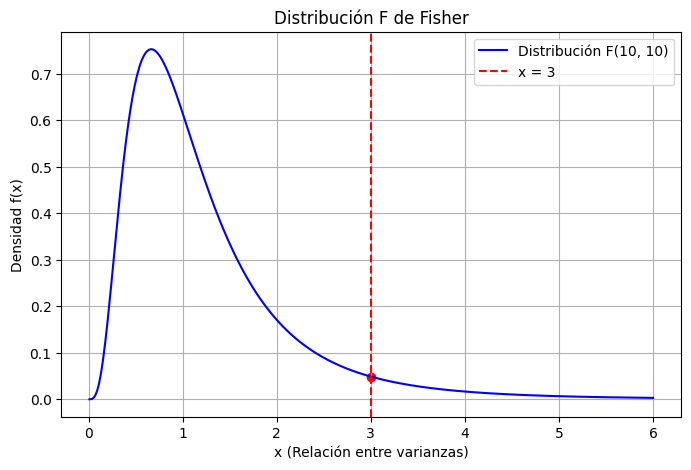

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parámetros del problema
x = 3           # relación entre las varianzas
dof1 = 10       # grados de libertad del numerador (a)
dof2 = 10       # grados de libertad del denominador (b)

# Cálculo de f(x)
fx = f.pdf(x, dfn=dof1, dfd=dof2)

# Mostrar resultado
print(f"f(x=3) con v1={dof1} y v2={dof2} es aproximadamente: {fx:.5f}")

# -------------------------------
# Graficar la distribución F
x_vals = np.linspace(0.01, 6, 500)
y_vals = f.pdf(x_vals, dfn=dof1, dfd=dof2)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label=f'Distribución F({dof1}, {dof2})', color='blue')
plt.axvline(x, color='red', linestyle='--', label=f'x = {x}')
plt.scatter([x], [fx], color='red')
plt.title("Distribución F de Fisher")
plt.xlabel("x (Relación entre varianzas)")
plt.ylabel("Densidad f(x)")
plt.legend()
plt.grid(True)
plt.show()


## Ejemplo2
[Ir a Ejemplo 1](#Ejemplo1) | [Ir a Ejemplo 3](#Ejemplo3) | [Menú principal](../MenuPrincipal.ipynb)

Calcular los siguientes valores de una distribución F de Fisher:

- A: área izquierda con 0.95 con 15 y 10 grados de libertad  
- B: área izquierda con 0.99 con 20 y 25 grados de libertad

**Solución b)** Sea _n_ el valor a buscar en las tablas de Fisher tal que \( P(X \leq n) = 0.99 \)


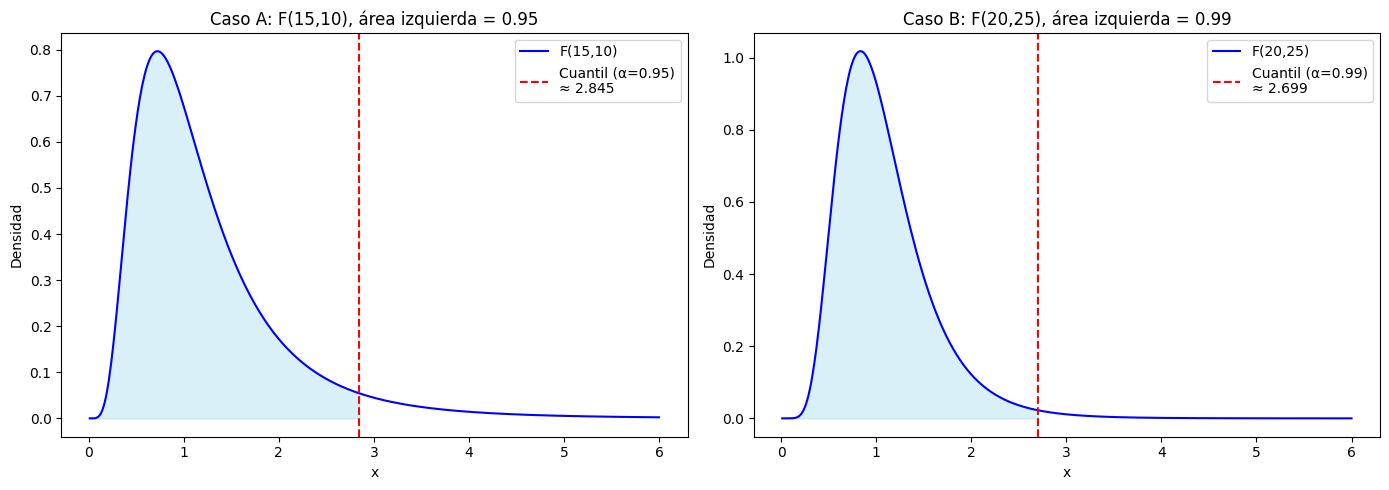

Caso A) Cuantil F(15,10) con área izquierda 0.95 = 2.8450
Caso B) Cuantil F(20,25) con área izquierda 0.99 = 2.6993


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parámetros para los dos casos
params = [
    {"gl1": 15, "gl2": 10, "alpha": 0.95, "label": "Caso A"},
    {"gl1": 20, "gl2": 25, "alpha": 0.99, "label": "Caso B"}
]

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, p in enumerate(params):
    gl1 = p["gl1"]
    gl2 = p["gl2"]
    alpha = p["alpha"]
    label = p["label"]

    # Eje x
    x = np.linspace(0.01, 6, 500)

    # Densidad
    pdf = f.pdf(x, gl1, gl2)

    # Valor crítico (cuantil)
    cuantil = f.ppf(alpha, gl1, gl2)

    # Gráfica de densidad
    axs[i].plot(x, pdf, label=f"F({gl1},{gl2})", color="blue")
    axs[i].axvline(cuantil, color='red', linestyle='--', label=f'Cuantil (α={alpha})\n≈ {cuantil:.3f}')
    axs[i].fill_between(x, 0, pdf, where=(x <= cuantil), color='skyblue', alpha=0.3)
    
    # Etiquetas y título
    axs[i].set_title(f"{label}: F({gl1},{gl2}), área izquierda = {alpha}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("Densidad")
    axs[i].legend()

plt.tight_layout()
plt.show()

# Imprimir los valores críticos en consola
for p in params:
    cuantil = f.ppf(p["alpha"], p["gl1"], p["gl2"])
    print(f"{p['label']}) Cuantil F({p['gl1']},{p['gl2']}) con área izquierda {p['alpha']} = {cuantil:.4f}")


## Ejemplo3
[Ir a Ejemplo 1](#Ejemplo1) | [Ir a Ejemplo 2](#Ejemplo2) | [Menú principal](../MenuPrincipal.ipynb)
9.4.- Dibujar la función de densidad y la función de distribución de una
variable aleatoria F(5,10). Calcular F5,10;0.05. 

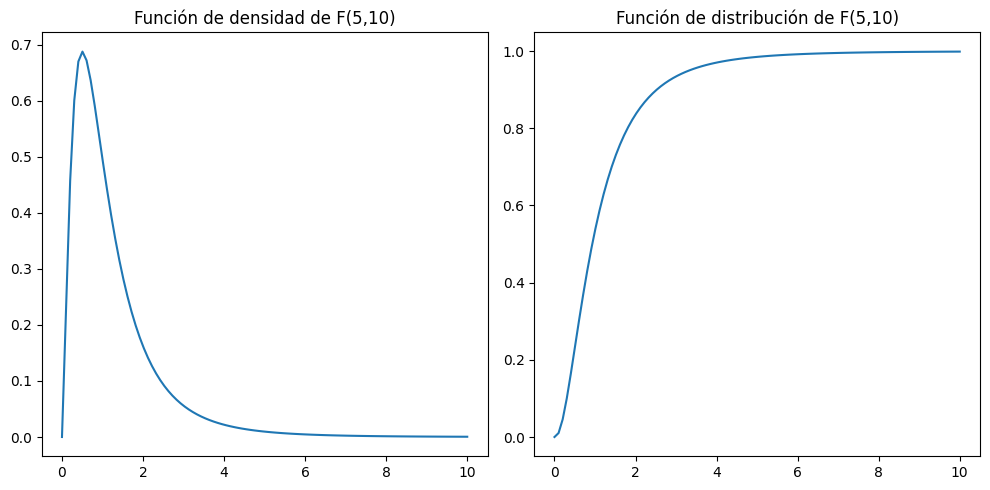

Cuantil 0.95: 3.3258345304130112


In [4]:
from scipy.stats import f
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, f.pdf(x, 5, 10), label='Densidad')
plt.title('Función de densidad de F(5,10)')
plt.subplot(1, 2, 2)
plt.plot(x, f.cdf(x, 5, 10), label='Distribución')
plt.title('Función de distribución de F(5,10)')
plt.tight_layout()
plt.show()
print(f"Cuantil 0.95: {f.ppf(0.95, 5, 10)}")